In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('sentiment_dataset.csv')

In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [ ]:
df.duplicated().sum()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

In [ ]:
df_new = df[['Text', 'Sentiment']]

In [ ]:
df_new

# text cleaning or pre-processing

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [ ]:
df_new['Text']

In [ ]:
import string
string.punctuation

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df_new['Text']= df_new['Text'].apply(lambda x:remove_punctuation(x))

In [ ]:
df_new['Text']

In [ ]:
import re
import nltk
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords

In [ ]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['Text'] = df_new['Text'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_new['Text']

In [ ]:
import nltk
nltk.download('wordnet')


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [ ]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer(x))

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
df_new['Text']

In [ ]:
def lemmatizer_new(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    return lemm_text

In [ ]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer_new(x))

In [ ]:
df_new['Text']

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [ ]:
df_new['Text']

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_digits(x))

In [ ]:
df_new['Text']

In [ ]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_emojis(x))

In [ ]:
df_new['Text']

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [ ]:
df_new['Text']

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
df_new['Text']

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_urls(x))

In [ ]:
df_new['Text']

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df_new['sentiment'] = df_new['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df_new

In [ ]:
df_new['sentiment_category'] = df_new['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

In [ ]:
df_new

In [ ]:
df = df_new[['Text', 'sentiment_category']]

In [ ]:
label_mapping = {'Negative': -1, 'Positive': 1}
df['sentiment_category'] = df['sentiment_category'].map(label_mapping)

In [ ]:
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df['Text']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
positive_text = ' '.join(df.loc[df['sentiment_category'] == 1, 'Text'])

if positive_text.strip():
    wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(positive_text)
    plt.figure(figsize=(30, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No positive text data available for word cloud generation.')

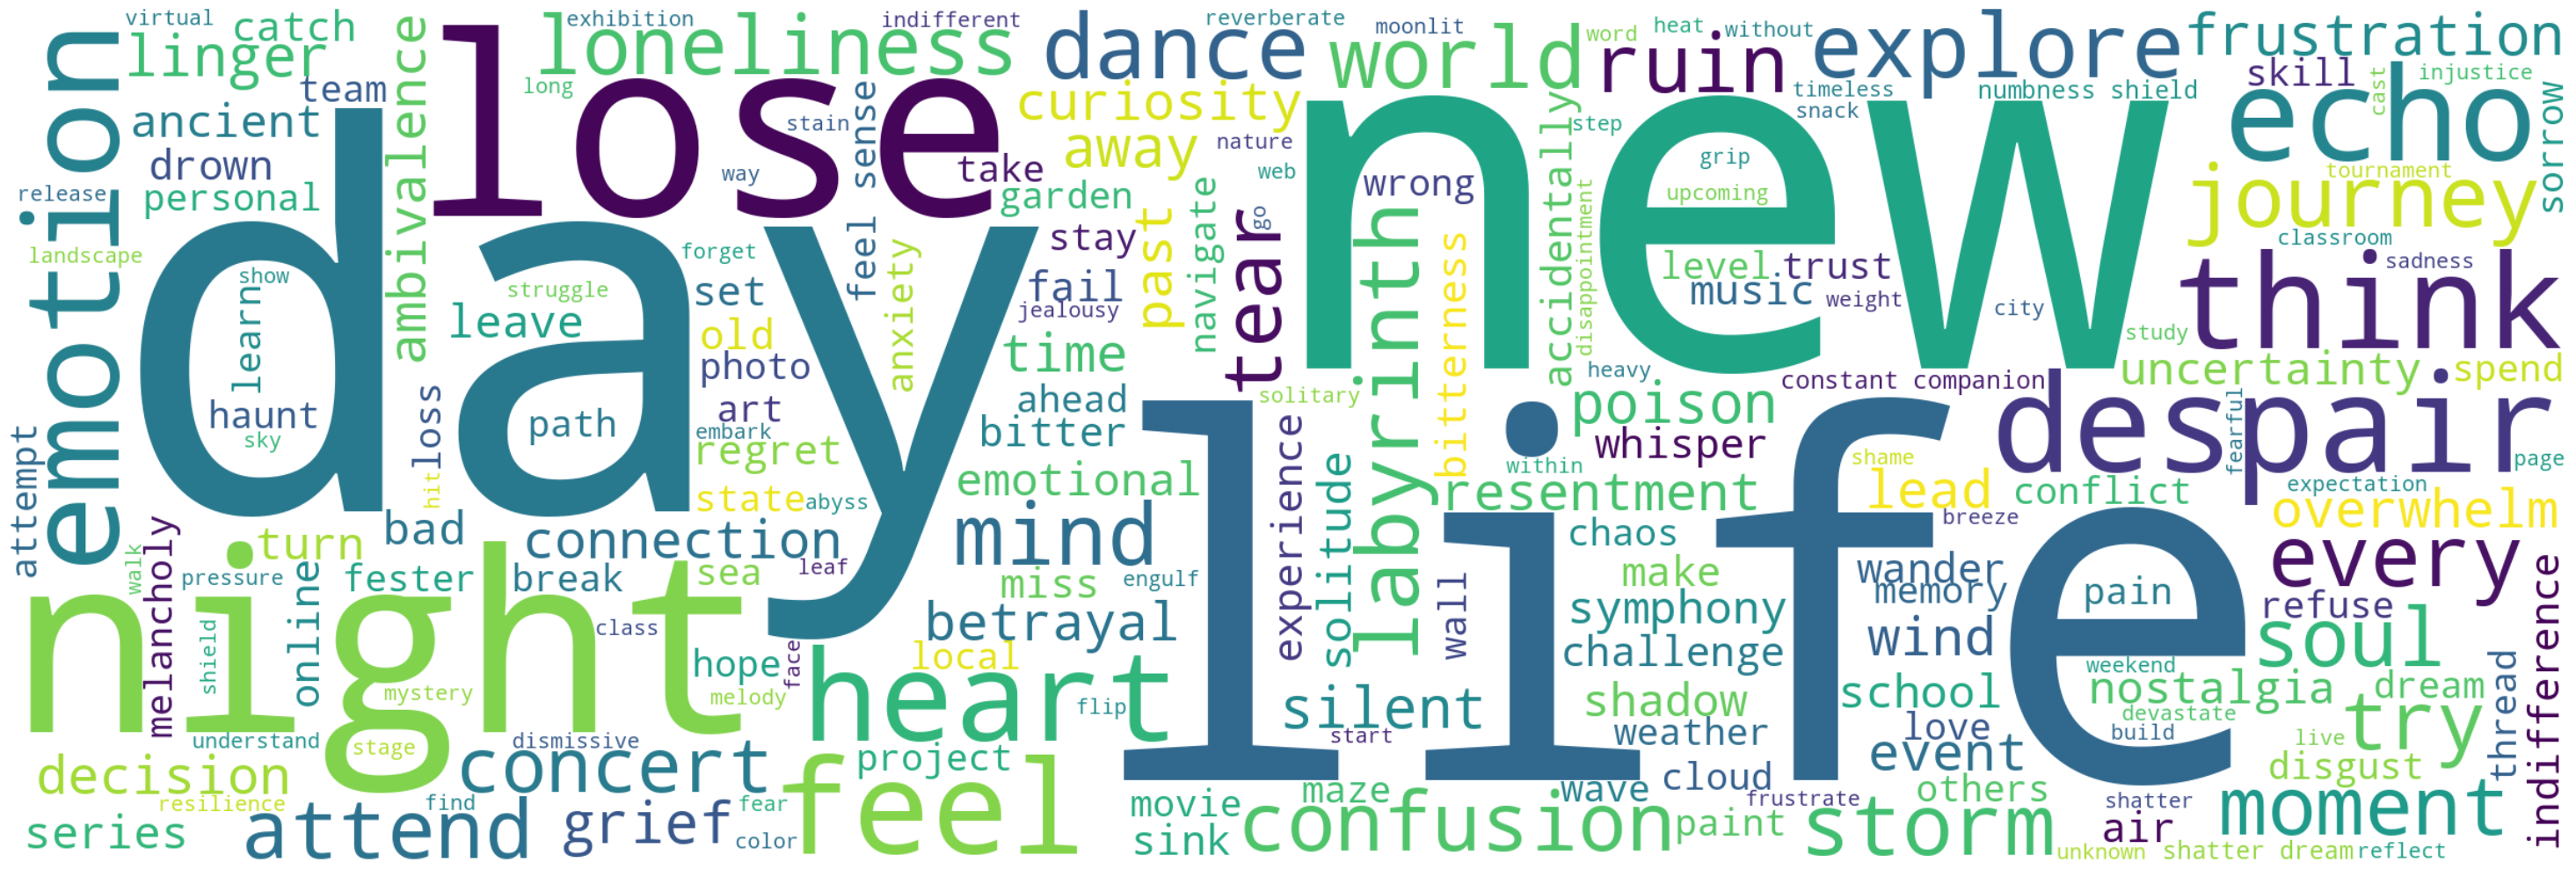

In [357]:
negative_text = ' '.join(df.loc[df['sentiment_category'] == -1, 'Text'])

if positive_text.strip():
    wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(negative_text)
    plt.figure(figsize=(30, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No negative text data available for word cloud generation.')

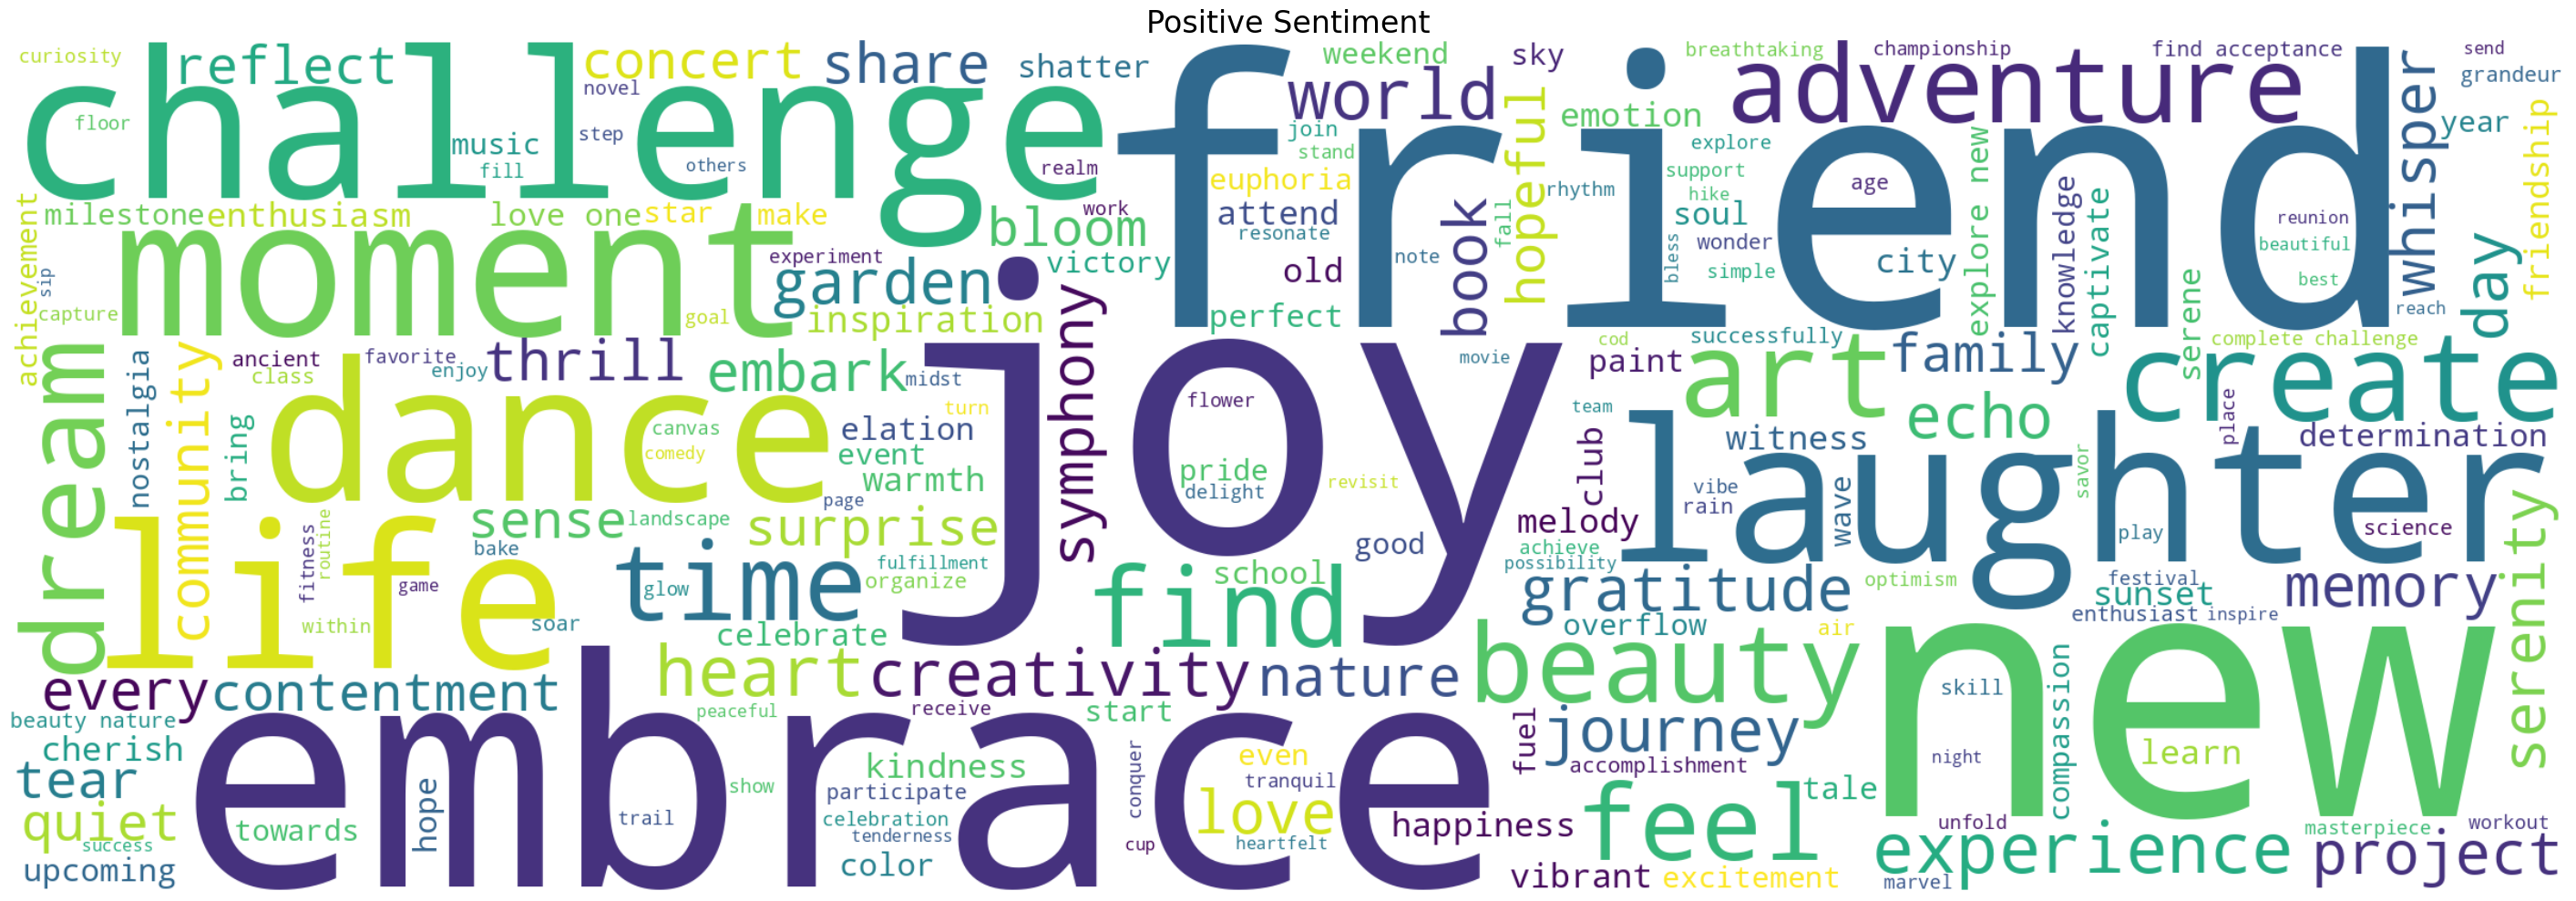

No text data available for sentiment: Neutral Sentiment


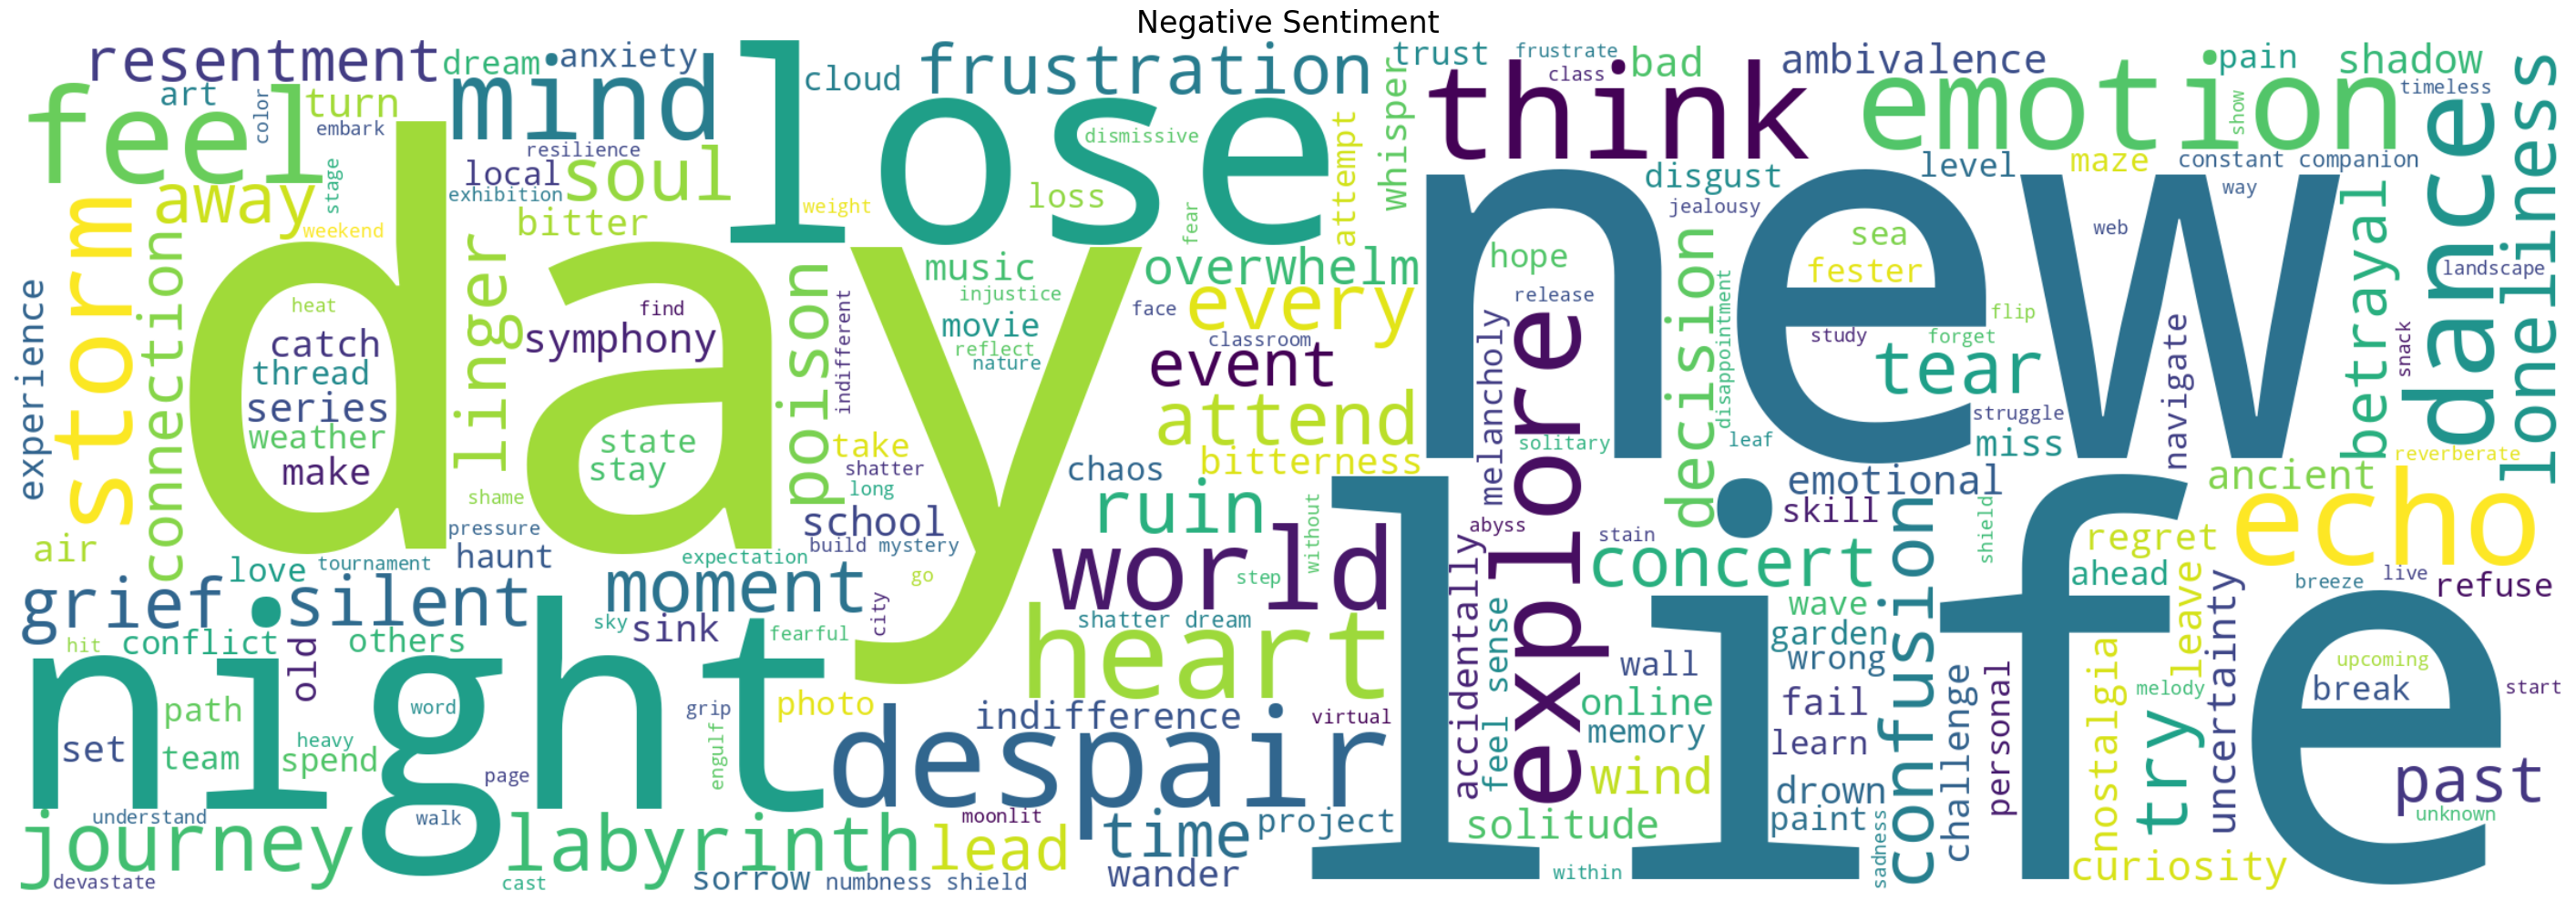

In [358]:
def generate_wordcloud_for_sentiment(sentiment_value, title):
    text = ' '.join(df.loc[df['sentiment_category'] == sentiment_value, 'Text']).strip()
    if text:
        wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(text)
        plt.figure(figsize=(30, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.tight_layout()
        plt.show()
    else:
        print(f'No text data available for sentiment: {title}')

generate_wordcloud_for_sentiment(1, 'Positive Sentiment')
generate_wordcloud_for_sentiment(0, 'Neutral Sentiment')
generate_wordcloud_for_sentiment(-1, 'Negative Sentiment')

In [359]:
df

Text  sentiment_category
0                             enjoy beautiful day park                   1
1                             traffic terrible morning                  -1
2                                finish amaze workout                    1
3                      excite upcoming weekend getaway                   1
4                        try new recipe dinner tonight                  -1
..                                                 ...                 ...
727  collaborate science project receive recognitio...                   1
728  attend surprise birthday party organize friend...                   1
729  successfully fundraise school charity initiati...                   1
730  participate multicultural festival celebrate d...                   1
731  organize virtual talent show challenge time br...                   1

[712 rows x 2 columns]

In [360]:
df['sentiment_category'].value_counts()

sentiment_category
 1    444
-1    268
Name: count, dtype: int64

In [361]:
from sklearn.utils import resample

df_pos = df[df['sentiment_category'] == 1]
df_neg = df[df['sentiment_category'] == -1]
df_neu = df_new[df_new['sentiment_category'] == 'Neutral']

max_count = df['sentiment_category'].value_counts().max()

df_neg_upsampled = resample(df_neg, replace=True, n_samples=max_count, random_state=42)

# Check if df_neu is empty before attempting to resample
if not df_neu.empty:
    df_neu_upsampled = resample(df_neu, replace=True, n_samples=max_count, random_state=42)
    df_balanced = pd.concat([df_pos, df_neg_upsampled, df_neu_upsampled])
else:
    df_balanced = pd.concat([df_pos, df_neg_upsampled])


df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [362]:
df_balanced['sentiment_category'].value_counts()

sentiment_category
 1    444
-1    444
Name: count, dtype: int64

In [363]:
df_balanced.columns

Index(['Text', 'sentiment_category'], dtype='object')

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Text'])
y = df_balanced['sentiment_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8932584269662921

Confusion Matrix:
 [[75 14]
 [ 5 84]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.84      0.89        89
           1       0.86      0.94      0.90        89

    accuracy                           0.89       178
   macro avg       0.90      0.89      0.89       178
weighted avg       0.90      0.89      0.89       178



In [365]:
from sklearn.tree import DecisionTreeClassifier

In [366]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8539325842696629

Confusion Matrix:
 [[72 17]
 [ 9 80]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.81      0.85        89
           1       0.82      0.90      0.86        89

    accuracy                           0.85       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.85      0.85       178



In [367]:
from sklearn.ensemble import RandomForestClassifier

In [368]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9157303370786517

Confusion Matrix:
 [[75 14]
 [ 1 88]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.99      0.84      0.91        89
           1       0.86      0.99      0.92        89

    accuracy                           0.92       178
   macro avg       0.92      0.92      0.92       178
weighted avg       0.92      0.92      0.92       178



In [369]:
from sklearn.naive_bayes import MultinomialNB

In [370]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8595505617977528

Confusion Matrix:
 [[78 11]
 [14 75]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.88      0.86        89
           1       0.87      0.84      0.86        89

    accuracy                           0.86       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.86      0.86      0.86       178



In [371]:
from sklearn.neural_network import MLPClassifier

In [372]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9044943820224719

Confusion Matrix:
 [[80  9]
 [ 8 81]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.90      0.90        89
           1       0.90      0.91      0.91        89

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



In [373]:
import tensorflow as tf

Unique labels in y (before mapping): [-1  1]
Unique labels in y (after mapping): [0 2]
X_train shape: (710, 1897), dtype: float64
X_test shape: (178, 1897), dtype: float64
y_train shape: (710,), dtype: int32
y_test shape: (178,), dtype: int32
Unique labels in y_train: [0 2]
Unique labels in y_test: [0 2]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       242,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,395 (982.01 KB)

 Trainable params: 251,395 (982.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5282 - loss: 1.0545 - val_accuracy: 0.6972 - val_loss: 0.9362
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7565 - loss: 0.8741 - val_accuracy: 0.7113 - val_loss: 0.7425
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8769 - loss: 0.6517 - val_accuracy: 0.8310 - val_loss: 0.5633
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9617 - loss: 0.4154 - val_accuracy: 0.8521 - val_loss: 0.4078
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9825 - loss: 0.1957 - val_accuracy: 0.8451 - val_loss: 0.3351
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9970 - loss: 0.0878 - val_accuracy: 0.8380 - val_loss: 0.3368
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9979 - loss: 0.0354 - val_accuracy: 0.8380 - val_loss: 0.3294
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9997 - loss: 0.0225 - val_accuracy: 0.8310 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Accuracy: 0.898876404494382

Confusion Matrix:
 [[78 11]
 [ 7 82]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.88      0.90        89
    positive       0.88      0.92      0.90        89

    accuracy                           0.90       178
   macro avg       0.90      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178



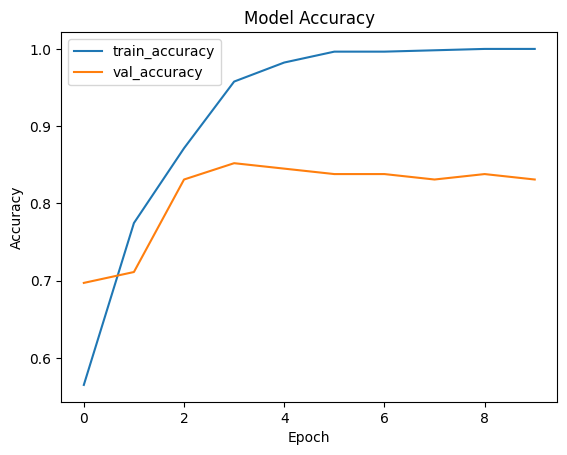

In [376]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

try:
    assert 'df_balanced' in globals(), "df_balanced DataFrame is not defined"
except AssertionError as e:
    print(e)
    raise

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Text']).toarray()
y = df_balanced['sentiment_category']

print("Unique labels in y (before mapping):", np.unique(y))

label_mapping = {-1: 0, 0: 1, 1: 2}
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    y = y.map(label_mapping)
else:
    y = y.replace(label_mapping)
y = y.astype(np.int32)

print("Unique labels in y (after mapping):", np.unique(y))

assert not np.any(np.isnan(X)), "X contains NaN values"
assert not np.any(np.isinf(X)), "X contains infinite values"
assert not np.any(np.isnan(y)), "y contains NaN values"
assert not np.any(np.isinf(y)), "y contains infinite values"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

assert np.all((y_train >= 0) & (y_train <= 2)), "y_train contains invalid labels"
assert np.all((y_test >= 0) & (y_test <= 2)), "y_test contains invalid labels"

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

y_pred = model.predict(X_test, batch_size=32)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nAccuracy:", accuracy_score(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=['negative', 'positive']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()